# NLP Sentiment Analysis from Amazon Item Reviews

Team:
1. Faraday Barr Fatahillah (1103213028)
2. Muhammad Farrel Ahadi Tama (110321)
3. Muhamad Hilmi Haidar (1103213005)


This project is for Assistant Lab Recruitment for i-Smile Laboratory

### Review Scraping using Selenium and BeautifulSoup Modules

In [49]:
link = 'https://www.amazon.com/Shark-HV322-Headlights-Lightweight-Attachments/product-reviews/B00NGVF4II/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1' # Sample Link
data = take_data(link)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.DataFrame(data, columns=['Nama', 'Bintang', 'Review'])
df.head(len(df))


No more pages


,Nama,Bintang,Review


## Preprocessing Data 

### Clean Text

In [46]:
import nltk
nltk.download('stopwords')
nltk.download('all')
from nltk.corpus import stopwords
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def preprocess(text):
    # Lower Text
    text = text.lower()
    
    # Remove Special Characters
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.translate(str.maketrans('','', string.punctuation))
    
    # Remove Repetitions
    text = re.sub(r'(.)\1+', r'\1\1', text)
    
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    
    # Remove Stopwords
    stop_word = set(stopwords.words('indonesian'))
    tokens = [word for word in tokens if word not in stop_word]
    
    # Stemming
    stemmer = StemmerFactory().create_stemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    
    clean_text = ' '.join(stemmed_tokens)
    
    return clean_text
    
    
df['Review'] = df['Review'].apply(preprocess)
df.head()

AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

## EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Nama     286 non-null    object
 1   Bintang  286 non-null    int64 
 2   Review   286 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.8+ KB


In [ ]:
df['Bintang'].value_counts()

Bintang
5    241
4     22
3     10
1      9
2      4
Name: count, dtype: int64

In [ ]:
#Shape of Datasets, Breakdown the Classes
print(f"Input data memiliki {len(df)} baris dan {len(df.columns)} kolom")
print(f"Bintang 1.0 = {len(df[df['Bintang']==1.0])} baris")
print(f"Bintang 2.0 = {len(df[df['Bintang']==2.0])} baris")
print(f"Bintang 3.0 = {len(df[df['Bintang']==3.0])} baris")
print(f"Bintang 4.0 = {len(df[df['Bintang']==4.0])} baris")
print(f"Bintang 5.0 = {len(df[df['Bintang']==5.0])} baris")

Input data memiliki 286 baris dan 3 kolom
Bintang 1.0 = 9 baris
Bintang 2.0 = 4 baris
Bintang 3.0 = 10 baris
Bintang 4.0 = 22 baris
Bintang 5.0 = 241 baris


Jumlah Null dalam Review : 0
Jumlah Null dalam Bintang : 0


<Axes: xlabel='Bintang', ylabel='count'>

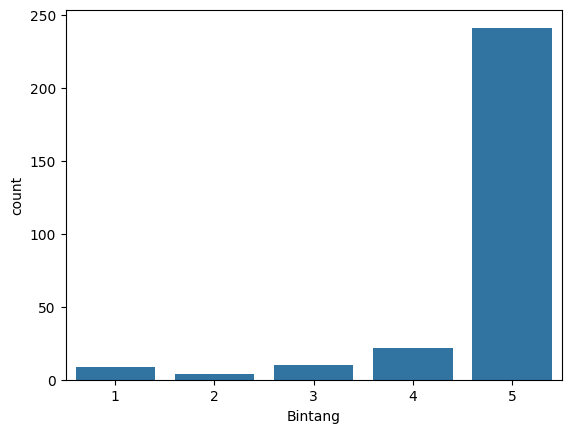

In [ ]:
#Mencari Missing Values dalam dataset
print(f"Jumlah Null dalam Review : {df['Review'].isnull().sum()}")
print(f"Jumlah Null dalam Bintang : {df['Bintang'].isnull().sum()}")
sns.countplot(x='Bintang', data=df )

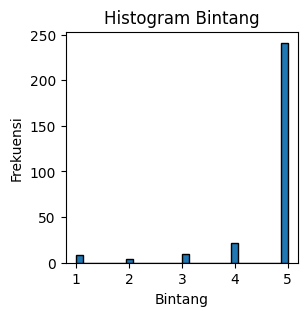

In [ ]:
df_numerik = df.select_dtypes(include=['int', 'float'])
df_kategori = df.select_dtypes(include=['object'])
for column in df_numerik.columns:
 plt.figure(figsize=(3, 3))
 plt.hist(df[column], bins=30, edgecolor='black')
 plt.title(f'Histogram {column}')
 plt.xlabel(f'{column}')
 plt.ylabel('Frekuensi')
 plt.show()

## Wordcloud Visualization

In [ ]:
from wordcloud import WordCloud


In [ ]:
df_negative = df[ (df['Bintang']==1.0) | (df['Bintang']==2.0) | (df['Bintang']==3.0)]
df_positive = df[ (df['Bintang']==4.0) | (df['Bintang']==5.0)]
#convert to list
negative_list = df_negative['clean_text'].tolist()
positive_list = df_positive['clean_text'].tolist()

filtered_negative = ("").join(str(negative_list))
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list))
filtered_positive = filtered_positive.lower()

KeyError: 'lemmatized_review'

Positive WordCloud

In [ ]:
wordcloud = WordCloud(max_font_size = 160,margin = 0, background_color = "white", colormap = "Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Words")
plt.show()

Negative WordCloud

In [ ]:
wordcloud = WordCloud(max_font_size = 160,margin = 0, background_color = "white", colormap = "Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Words")
plt.show()

## Feature Extraction from Text

## Confusion Matrix Visualization